<a href="https://colab.research.google.com/github/Mun-Robbery/kaggle_competitions/blob/main/Safe_Driver_Prediction_imbalance_observ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"antrisole","key":"b94871d96930002e0e8ee14935e732a7"}'}

In [51]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [52]:
!kaggle competitions download -c porto-seguro-safe-driver-prediction

porto-seguro-safe-driver-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [53]:
!unzip porto-seguro-safe-driver-prediction

Archive:  porto-seguro-safe-driver-prediction.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [76]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv', index_col='id')
test_df = pd.read_csv('/content/test.csv', index_col='id')

train_df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

Имена объектов включают постфикс **bin** для обозначения *бинарных* и **cat** *категориальных* объектов. Признаки без этих обозначений являются либо *непрерывными*, либо *порядковыми*.

Ну что сказать... начинается фича, мать его, инженеринг

In [79]:
train_df.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [80]:
import numpy as np

In [81]:
train_df = train_df.replace(-1, np.nan)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   594996 non-null  float64
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595129 non-null  float64
 5   ps_ind_05_cat   589403 non-null  float64
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

In [82]:
# удаляем столбец ps_car_03_cat, т.к. имеем меньше половины известных записей
train_df = train_df.drop(columns=['ps_car_03_cat'])

In [120]:
test_df = test_df.drop(columns=['ps_car_03_cat'])

In [118]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = train_df.columns[1:]

X = train_df[labels]
y = train_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.36%


In [140]:
sub_X = test_df

In [121]:
preds_test = model.predict(test_df)

In [130]:
len(preds_test)

892816

In [132]:
output = pd.DataFrame({'id': test_df.index,
                       'target': preds_test})
output.to_csv('submission_1.csv', index=False)

In [85]:
model = XGBClassifier()
model.fit(X_train[['ps_calc_01']], y_train)
y_pred = model.predict(X_test[['ps_calc_01']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.36%


Такой результат достигается тем, что распределение target переменных черезвучайно несбалансировно

Class 0: 573518
Class 1: 21694
Proportion: 26.44 : 1


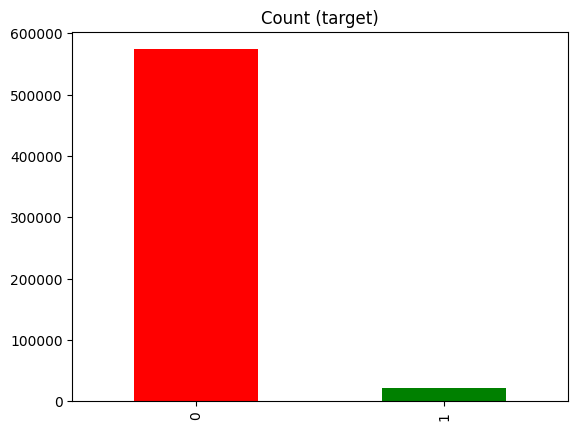

In [88]:
target_count = train_df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

colors = ['red', 'green']

target_count.plot(kind='bar', title='Count (target)', color = colors);

Построим Confusion matrix

Confusion matrix:
 [[114709      0]
 [  4334      0]]


<ipython-input-89-8aeae4f6eca9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-89-8aeae4f6eca9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


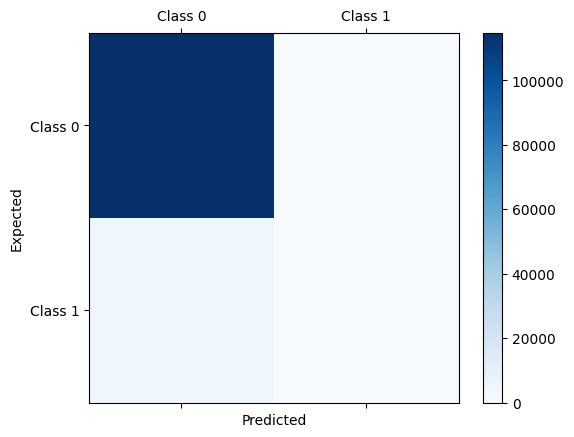

In [89]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Наша модель просто всем классам приписала 0 класс и получила хорошую метрику, т.к. если в наших данных 96% меток нулевого класса, то можно просто присвоить всем предиктам тоже 0 класс и получить acc = 0.96  

In [91]:
# Class count
count_class_0, count_class_1 = train_df.target.value_counts()

# Divide by class
df_class_0 = train_df[train_df['target'] == 0]
df_class_1 = train_df[train_df['target'] == 1]

**Random under-sampling**

Random under-sampling:
0    21694
1    21694
Name: target, dtype: int64


<Axes: title={'center': 'Count (target)'}>

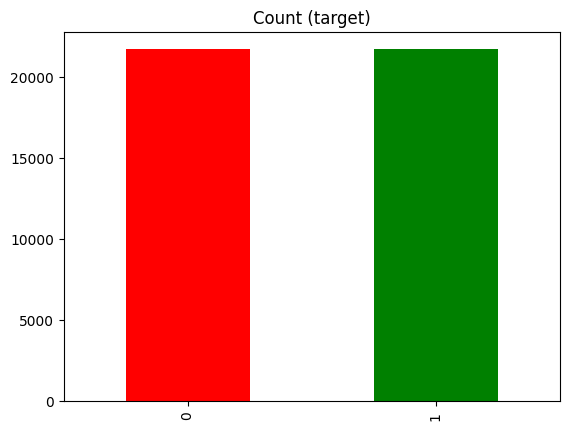

In [94]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)', color = colors)

**Random over-sampling**

Random over-sampling:
0    573518
1    573518
Name: target, dtype: int64


<Axes: title={'center': 'Count (target)'}>

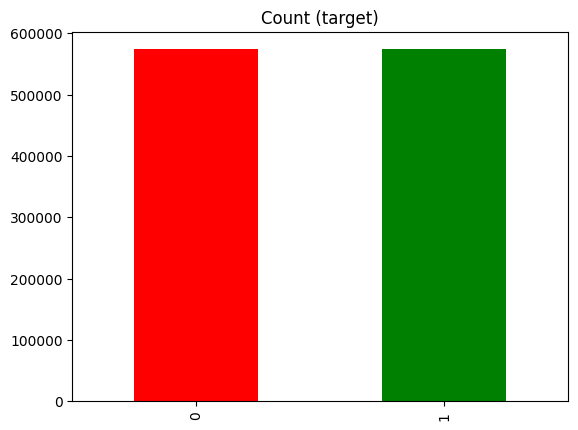

In [95]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)', color = colors)

In [96]:
import imblearn

<Axes: title={'center': 'Count (target)'}>

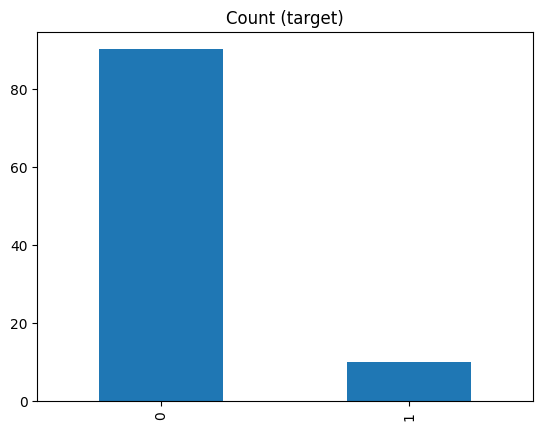

In [97]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)')

In [100]:
def plot_2d_space(X, y, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

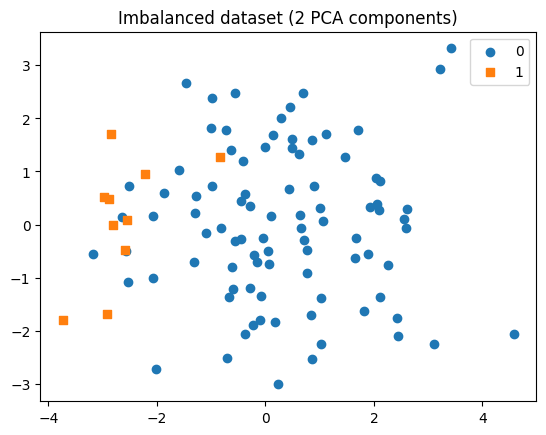

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

Random under-sampling and over-sampling with imbalanced-learn

In [141]:
sub_X = pca.fit_transform(sub_X)

Removed indexes: [42  6 38 94 21 61 20  2 10 58  4  8  9 14 16 40 67 70 71 74]


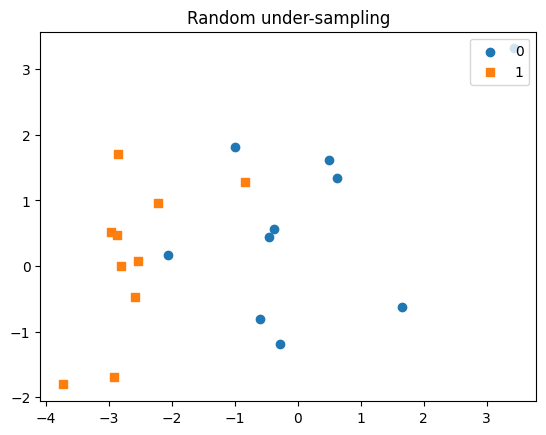

In [104]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

print('Removed indexes:', rus.sample_indices_)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

80 new random picked points


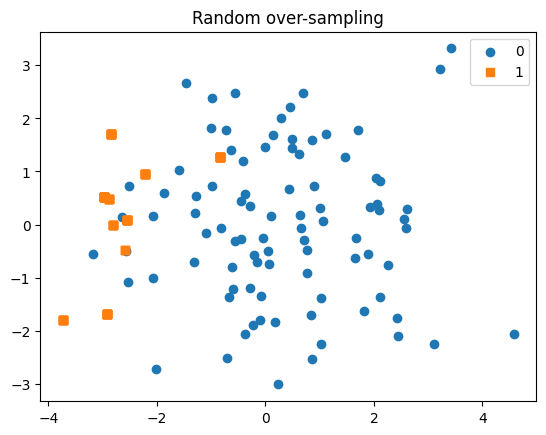

In [106]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

Removed indexes: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90 91 92 93 94 95 97 98 99]


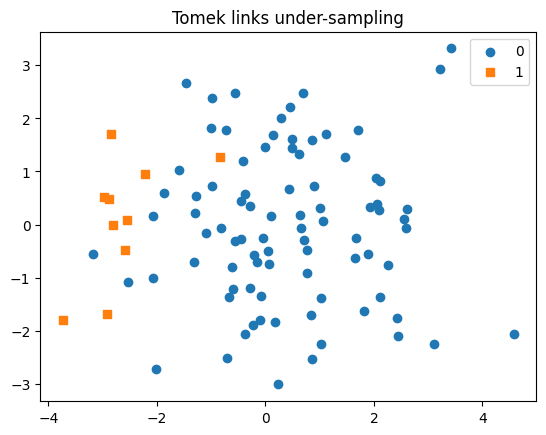

In [109]:
# проведём удаление близстоящих пар экземпляров для Under-sampling
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

print('Removed indexes:', tl.sample_indices_)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


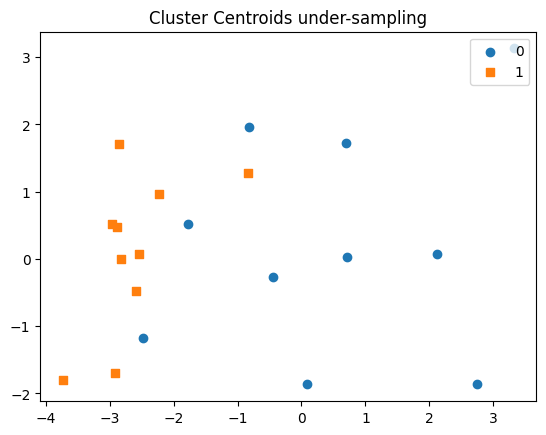

In [112]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 10})
X_cc, y_cc = cc.fit_resample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

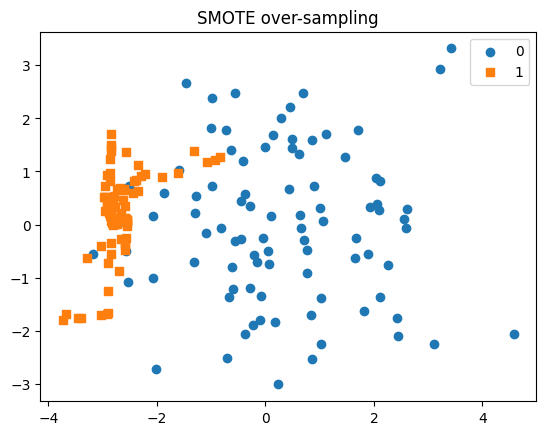

In [115]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

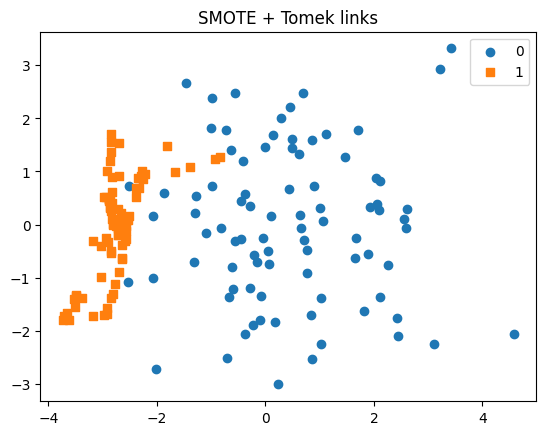

In [117]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [142]:
sub_X

array([[ -2.66847317,  -5.66856041],
       [-40.73416023,   4.07389577],
       [ 33.25142072,   7.66958799],
       ...,
       [ 45.26237027,   4.59371722],
       [ 34.27781466,   3.76490628],
       [ 14.30183213,  -2.33727073]])

In [143]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_smt, y_smt)

preds = model.predict(sub_X)

In [144]:
output = pd.DataFrame({'id': test_df.index,
                       'target': preds})
output.to_csv('submission_2.csv', index=False)